In [252]:
#Scraping  IMDB Movie Review using selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
path = "/Users/Jagakala/Downloads/chromedriver_win32/chromedriver" # Chrome web driver
driver = webdriver.Chrome(path)
driver.get("https://www.imdb.com/title/tt1160419/reviews") # Movie -Dune Reviewlink to be scraped
movie_name = driver.find_element_by_class_name("parent").text # scrape movie name 
movie_name = movie_name.replace(" ", "_") # replace spaces with _
movie_name = movie_name.lower() + ".csv" # save full movie name with csv extension

# For loop below will click load button to load all reviews
for i in range(119): # 25reviews per page.  2975 reviews 
    try:
        button = WebDriverWait(driver, 30).until(
            EC.presence_of_element_located((By.ID, "load-more-trigger")) 
        )
        button.click()

    except:
        driver.implicitly_wait(5)


reviews = []
try:
    # find all reviews
    all_reviews = WebDriverWait(driver, 30).until(
        EC.presence_of_all_elements_located((By.CLASS_NAME, "content"))
    )
    # find all ratings
    all_ratings = WebDriverWait(driver, 30).until(
        EC.presence_of_all_elements_located((By.CLASS_NAME, "rating-other-user-rating"))
    )
    full_review = ""
    # create review like rating | review and append it to the reviews list
    for i, j in zip(all_ratings,all_reviews):
        full_review = i.text + " | " + j.text
        reviews.append(full_review)

except:
    driver.quit()

# convert list to the dataframe and save it like csv format
df = pd.DataFrame(reviews)
df.rename(columns={0 : "Review"},inplace=True)
df.to_csv('data\movie_name_Dune.csv')


In [ ]:
******Data Cleaning Process*******

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB


In [270]:
import requests
import pandas as pd
import numpy as np
import csv 
DATAPATH = 'data\movie_name_Dune.csv'
df = pd.read_csv(DATAPATH)
print(df.head())

   Unnamed: 0                                             Review
0           0  7/10 | "Dune" is a great book and it, along wi...
1           1                                            8/10 | 
2           2  8/10 | Having read the book a hundred years ag...
3           3  6/10 | It is not a simple film. But an adaptat...
4           4                                            8/10 | 


In [271]:
#Renaming the blank Column with the name "Movie-ID"
df.rename(columns={"Unnamed: 0" : "Movie_ID"},inplace=True)
df.head()

,Movie_ID,Review
0,0,"7/10 | ""Dune"" is a great book and it, along wi..."
1,1,8/10 |
2,2,8/10 | Having read the book a hundred years ag...
3,3,6/10 | It is not a simple film. But an adaptat...
4,4,8/10 |


In [272]:
#Creating the new column sentiment using the fucntion lamda
df["Sentiment"] = df["Review"].apply(lambda x: x.split("|")[0])
df["Review"] = df["Review"].apply(lambda x: x.split("|")[1])
print(df.head())

   Movie_ID                                             Review Sentiment
0         0   "Dune" is a great book and it, along with its...     7/10 
1         1                                                        8/10 
2         2   Having read the book a hundred years ago, it ...     8/10 
3         3   It is not a simple film. But an adaptation of...     6/10 
4         4                                                        8/10 


In [273]:
#Data Clean-Up
df['Review'].replace(" ", np.nan, inplace=True) # replacing space with nan

df.dropna(inplace=True) #drop nan values, coz some of review didn't have actual review
df["Review"] = df["Review"].str.lower() # Converting everything to lower coz "Movie" and "movie" is not the same thing

# Removing special characters from Reviews
spec_chars = ["±","@","#","$","%","^",
                 "&","*","(",")","_","+","=",
                 "-","/",">","<","?",
                 "~","`","'","[","]","|","}",
                 "{",'"', ".",",","!",";","\n","\r"]

for char in spec_chars:
    df["Review"] = df["Review"].str.replace(char, "")

df["Review"].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii')) # getting rid of emojis

df['Review'] = df['Review'].str.replace('\d+', '') # Remove numbers from Reviews
df.head()

,Movie_ID,Review,Sentiment
0,0,dune is a great book and it along with its se...,7/10
2,2,having read the book a hundred years ago it t...,8/10
3,3,it is not a simple film but an adaptation of ...,6/10
6,6,its been amazing being back in cinemas after ...,10/10
7,7,i just reviewed the movie based on the same...,9/10


In [ ]:
****Assigning Binary Sentiment Values-Postive/Negative***

In [274]:
df["Rate"] = df["Sentiment"].apply(lambda x: x.split("/")[0]) 
df["Rate"] = pd.to_numeric(df["Rate"])

for i in range(len(df)):
    if (df["Rate"].iloc[i] < 5):
        df["Sentiment"].iloc[i] = "Negative"
    else:
        df["Sentiment"].iloc[i] = "Positive"
        
df.to_csv("data\cleaned_movie_dat_Dune1.csv") # Assigning new name to the cleaned dataset
df.head()

C:\Users\Jagakala\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Movie_ID,Review,Sentiment,Rate
0,0,dune is a great book and it along with its se...,Positive,7
2,2,having read the book a hundred years ago it t...,Positive,8
3,3,it is not a simple film but an adaptation of ...,Positive,6
6,6,its been amazing being back in cinemas after ...,Positive,10
7,7,i just reviewed the movie based on the same...,Positive,9


In [275]:
#sentiment count
df['Sentiment'].value_counts()

Positive    2027
Negative     609
Name: Sentiment, dtype: int64

In [ ]:
***TASK 2-Exploratory Data Analysis & Sentiment Analysis*****

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

df = pd.read_csv('data\cleaned_movie_dat_Dune1.csv')
df.drop(columns=["Unnamed: 0"],inplace=True)
print(df.head(5))

   Movie_ID                                             Review Sentiment  Rate
0         0   dune is a great book and it along with its se...  Positive     7
1         2   having read the book a hundred years ago it t...  Positive     8
2         3   it is not a simple film but an adaptation of ...  Positive     6
3         6   its been amazing being back in cinemas after ...  Positive    10
4         7   i just reviewed the  movie  based on the same...  Positive     9


In [ ]:
*****Exploratory Data Analysis****

In [262]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'Movie-Rating Distribution')

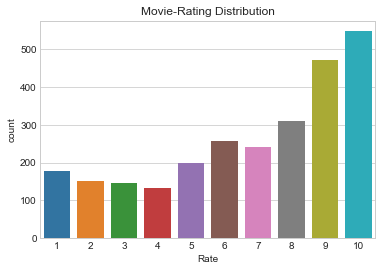

In [278]:
sns.countplot(df['Rate']).set_title('Movie-Rating Distribution')

In [279]:
df.describe()

,Movie_ID,Rate
count,2636.000000,2636.000000
mean,1482.241275,6.780728
std,841.759620,2.877595
min,0.000000,1.000000
25%,764.750000,5.000000
50%,1483.500000,8.000000
75%,2209.250000,9.000000
max,2941.000000,10.000000


Text(0.5,0.98,'Review Length Vs Rating Relation Check')

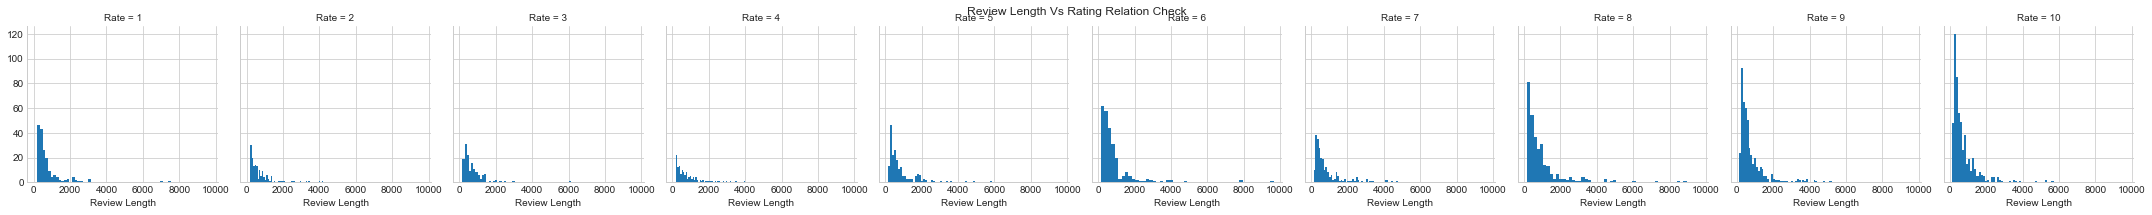

In [280]:
df['Review']=df['Review'].astype(str)
df['Review Length']=df['Review'].apply(len)

g = sns.FacetGrid(data=df, col='Rate')
g.map(plt.hist, 'Review Length', bins=50)
g.fig.suptitle('Review Length Vs Rating Relation Check')

Text(0.5,1,'Review Length VS Rating Range Check ')

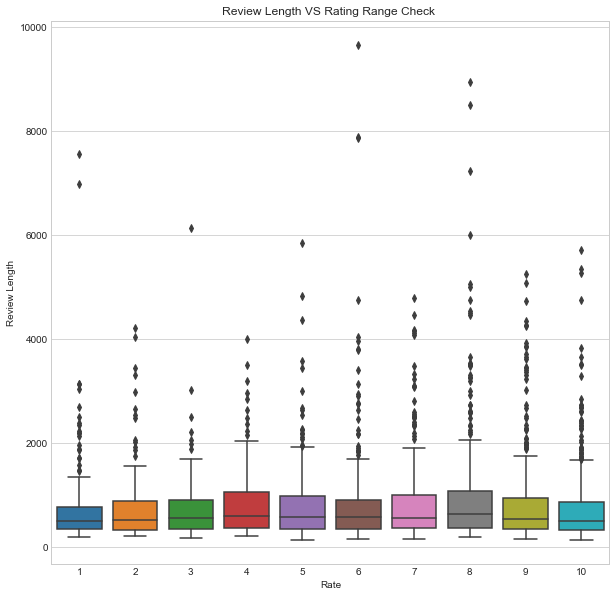

In [281]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Rate', y='Review Length', data=df).set_title('Review Length VS Rating Range Check ')

In [267]:
#Installing the libraries for the Sentiment Analysis 
!pip install stop_words
import stop_words
import nltk
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jagakala\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [282]:
# Converting the review text to lower case 
a = df['Review'].str.lower().str.cat(sep= ' ')
# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)
word_tokens = word_tokenize(b)

In [283]:
len(word_tokens)

393939

In [284]:
# Remove characters which have length less than 2  
without_single_chr = [word for word in word_tokens if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]   
cleaned_data_title 

['dune',
 'great',
 'book',
 'and',
 'along',
 'with',
 'its',
 'sequels',
 'are',
 'compelling',
 'reading',
 'however',
 'they',
 'are',
 'not',
 'short',
 'nor',
 'light',
 'reading',
 'and',
 'make',
 'decent',
 'version',
 'the',
 'first',
 'book',
 'its',
 'hard',
 'imagine',
 'doing',
 'anything',
 'other',
 'than',
 'making',
 'miniseries',
 'this',
 'was',
 'one',
 'several',
 'reasons',
 'why',
 'hated',
 'the',
 'david',
 'lynch',
 'version',
 'from',
 'crammed',
 'much',
 'stuff',
 'into',
 'such',
 'short',
 'film',
 'that',
 'often',
 'was',
 'confusingand',
 'the',
 'director',
 'himself',
 'hated',
 'the',
 'film',
 'apparently',
 'the',
 'studio',
 'took',
 'the',
 'movie',
 'away',
 'from',
 'him',
 'and',
 'hacked',
 'piecesthus',
 'making',
 'confusing',
 'because',
 'this',
 'was',
 'not',
 'interested',
 'seeing',
 'this',
 'versionuntil',
 'learned',
 'was',
 'only',
 'part',
 'one',
 'and',
 'the',
 'second',
 'film',
 'would',
 'complete',
 'the',
 'first',
 'd

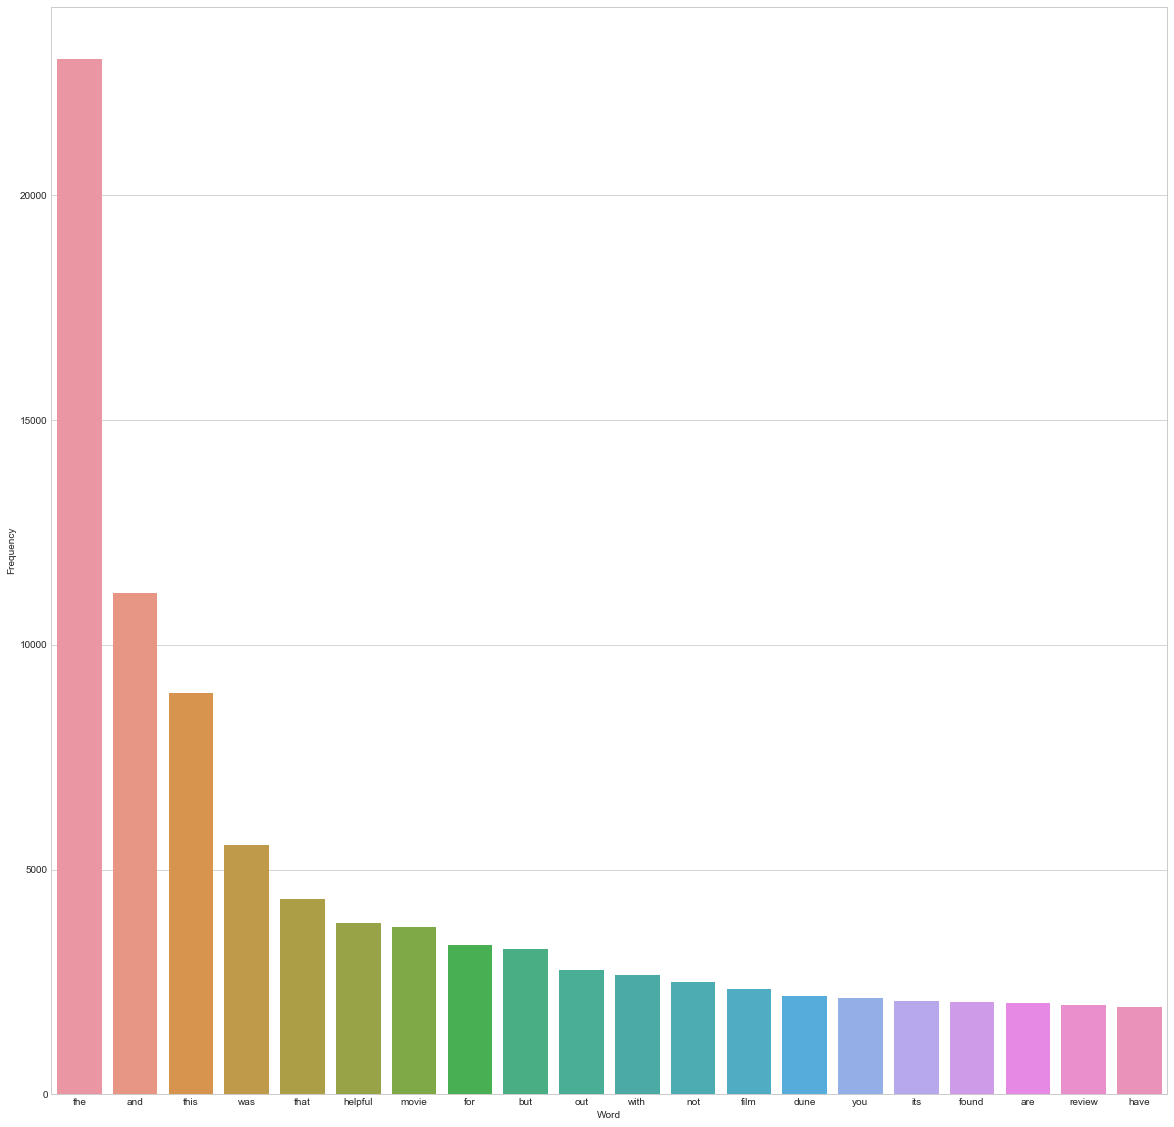

In [285]:
#Plotting barchart of the Top 20 words before removing stop word and warning spoilers
top_N = 500
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(20,20))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(20))

In [286]:
df = pd.read_csv('data\cleaned_movie_dat_Dune1.csv')
df.drop(columns=["Unnamed: 0"],inplace=True)
print(df.head(5))

   Movie_ID                                             Review Sentiment  Rate
0         0   dune is a great book and it along with its se...  Positive     7
1         2   having read the book a hundred years ago it t...  Positive     8
2         3   it is not a simple film but an adaptation of ...  Positive     6
3         6   its been amazing being back in cinemas after ...  Positive    10
4         7   i just reviewed the  movie  based on the same...  Positive     9


In [287]:
# Converting the review text to lower case 
a = df['Review'].str.lower().str.cat(sep= ' ')
# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)
word_tokens = word_tokenize(b)
#Removing the spoiler alert
b  =re.sub(r"(permalink)|( out of )|(found this helpful was this review helpful sign in to vote)"," ",a)
word_tokens = word_tokenize(b)
len(word_tokens)


369240

In [288]:
#remove all the stopwords from the text exempting the word "not" that is vital for sentiment Analysis
all_stopwords = stopwords.words('english')
all_stopwords.remove('not') #Exempting the word "Not" which is crucial for sentiment analysis
tokens_without_sw = [word for word in word_tokens if not word in all_stopwords]
print(tokens_without_sw)
len(tokens_without_sw)

['dune', 'great', 'book', 'along', 'sequels', 'compelling', 'reading', 'however', 'not', 'short', 'light', 'reading', 'make', 'decent', 'version', 'first', 'book', 'hard', 'imagine', 'anything', 'making', 'miniseries', 'one', 'several', 'reasons', 'hated', 'david', 'lynch', 'version', 'crammed', 'much', 'stuff', 'short', 'film', 'often', 'confusingand', 'director', 'hated', 'film', 'apparently', 'studio', 'took', 'movie', 'away', 'hacked', 'piecesthus', 'making', 'confusing', 'not', 'interested', 'seeing', 'versionuntil', 'learned', 'part', 'one', 'second', 'film', 'would', 'complete', 'first', 'dune', 'bookso', 'outset', 'film', 'cant', 'help', 'better', 'version', 'manages', 'something', 'didnt', 'expectits', 'actually', 'longor', 'felt', 'due', 'pacing', 'ridiculous', 'number', 'big', 'scenes', 'not', 'much', 'happens', 'see', 'lot', 'eye', 'candyalong', 'moody', 'music', 'many', 'ways', 'reminded', 'first', 'star', 'trek', 'moviewhich', 'long', 'tediousand', 'many', 'scenes', 'see'

195890

In [289]:
# Remove characters which have length less than 2  
without_single_chr = [word for word in tokens_without_sw if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]   
cleaned_data_title 
len(cleaned_data_title)

192954

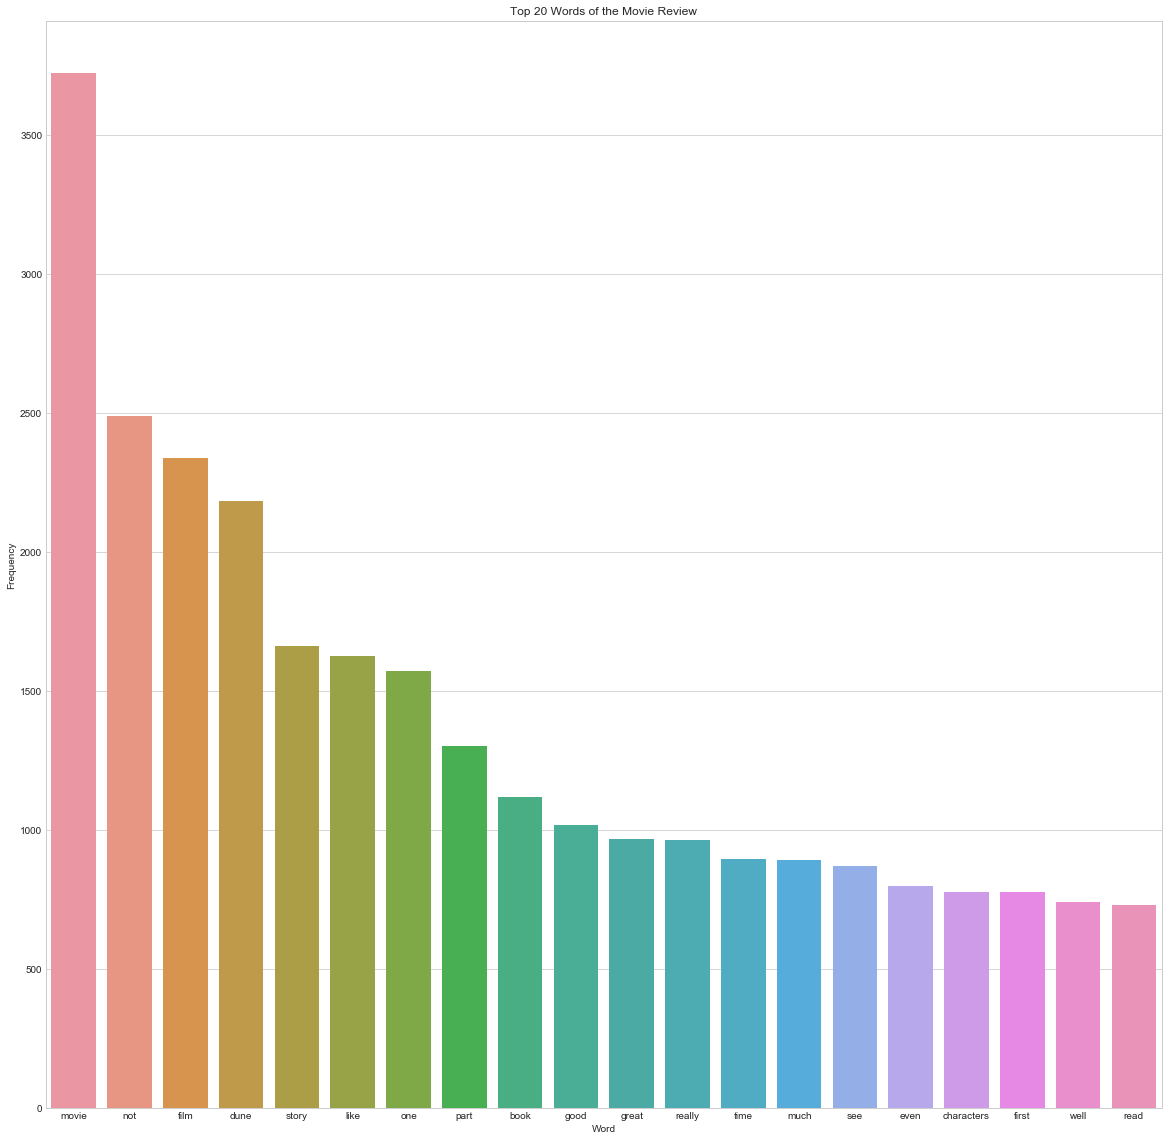

In [290]:
#Top 20 words check after tokenization, stop word removal and spoiler alert
top_N = 500
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(20,20))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(20)).set_title("Top 20 Words of the Movie Review")

In [291]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

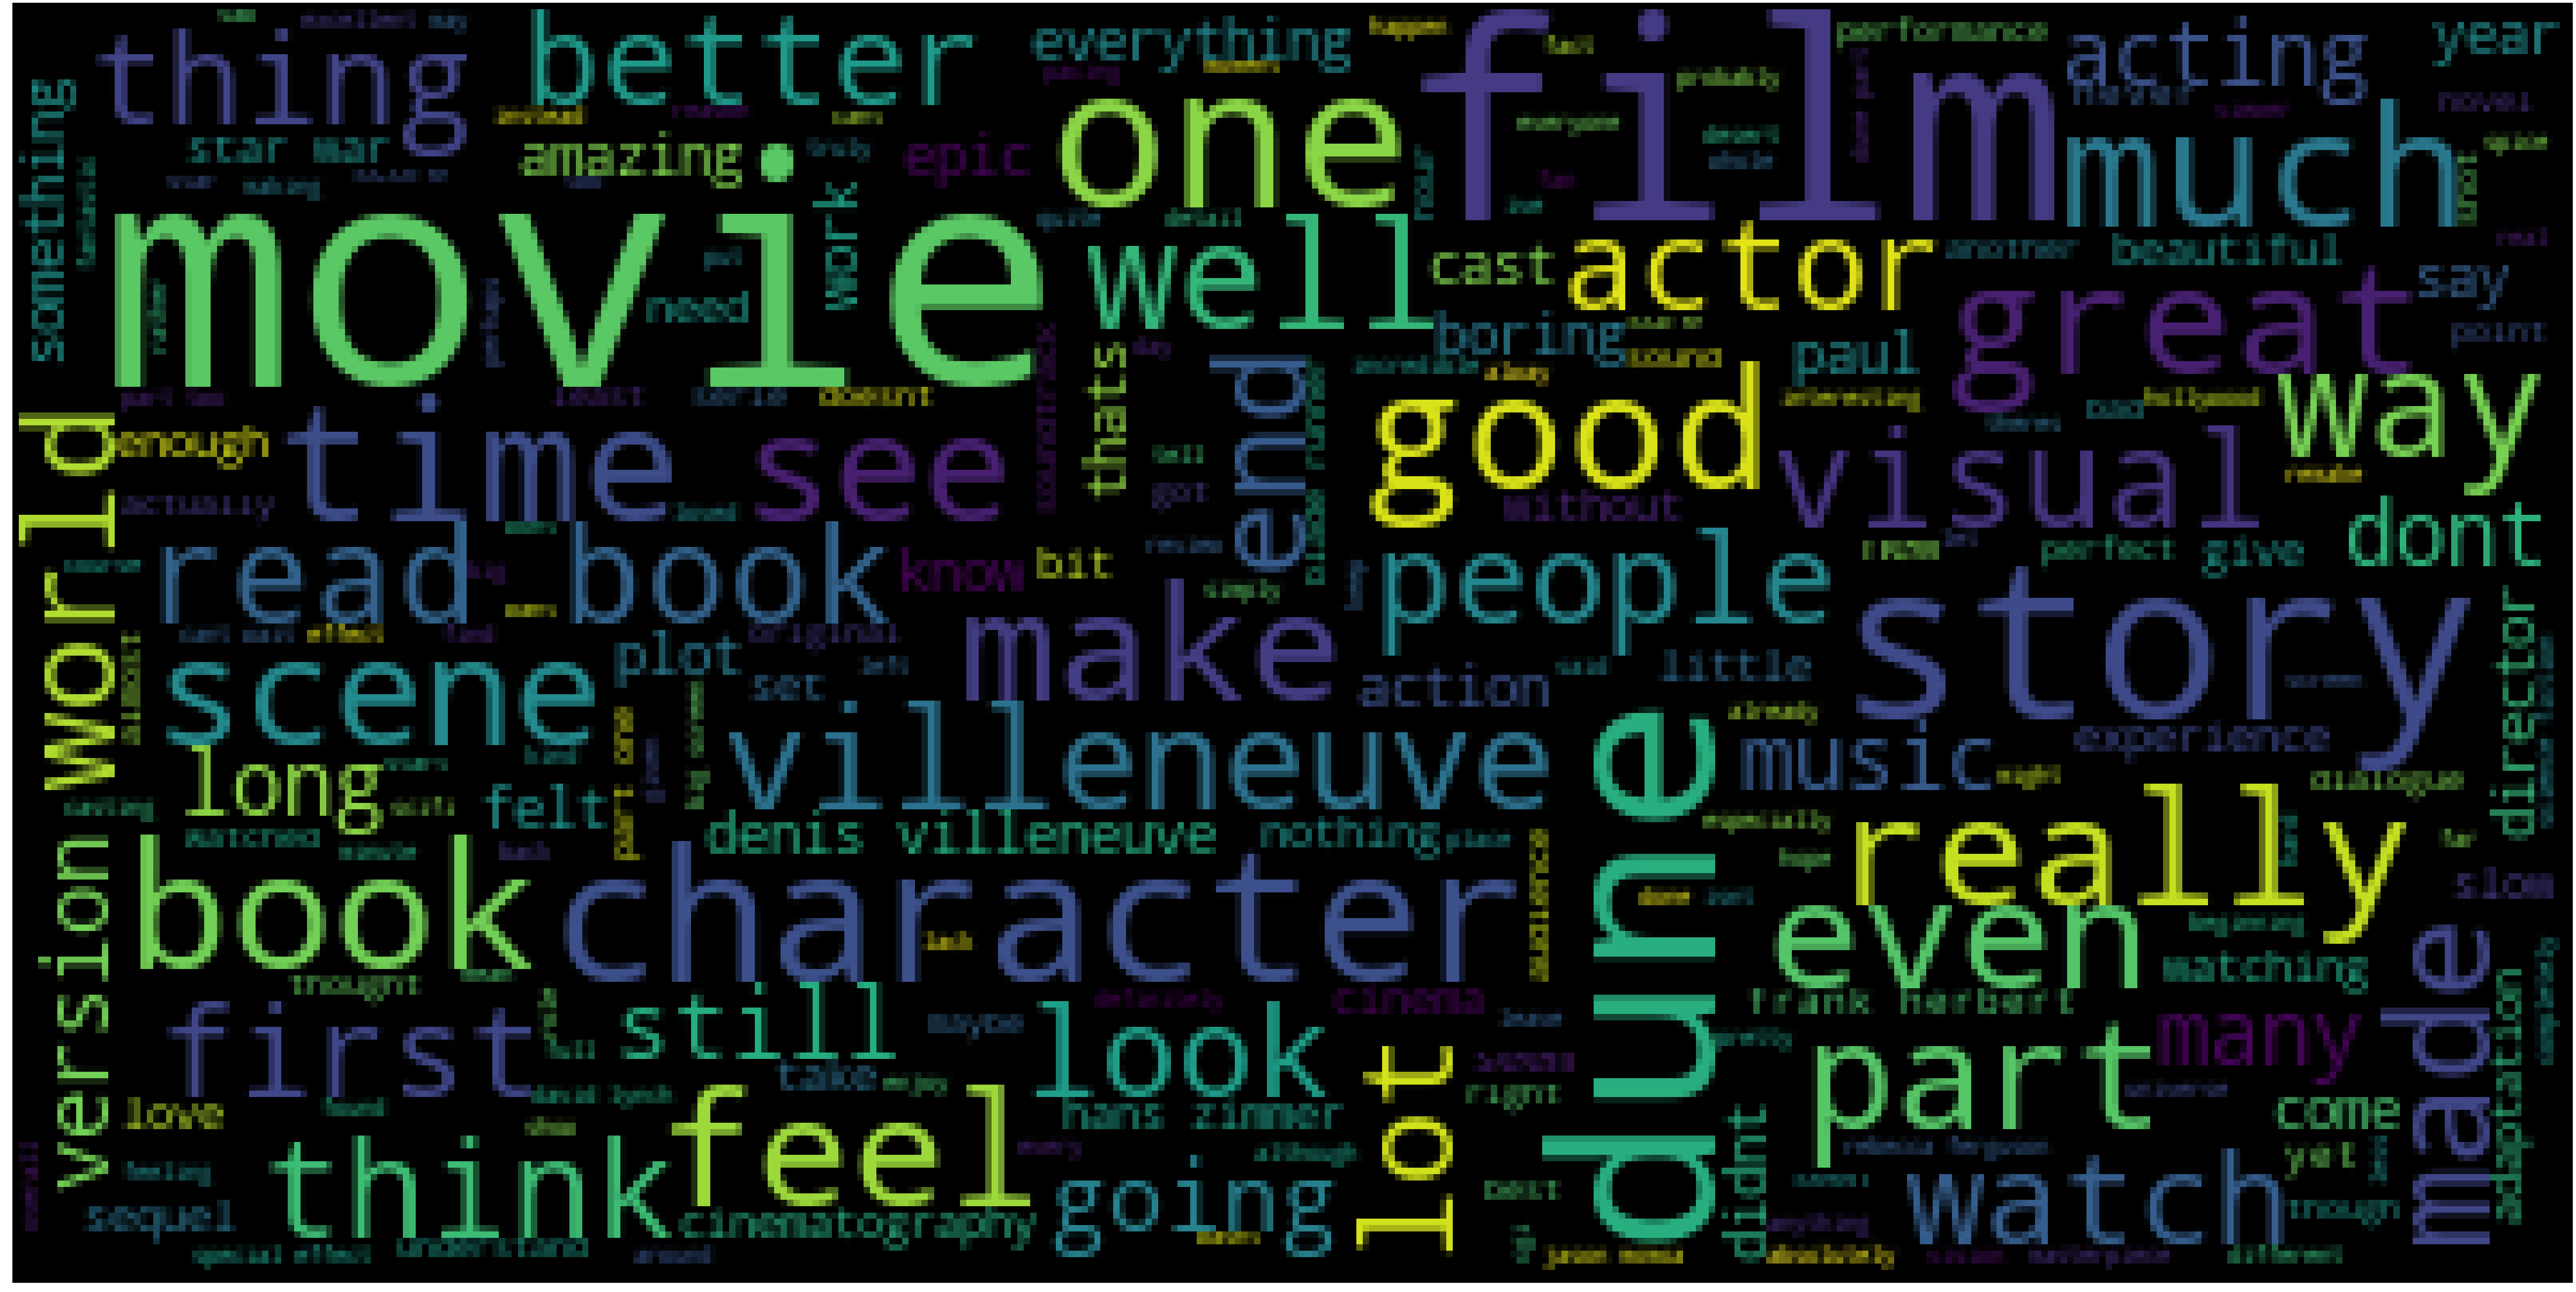

In [292]:
wc(cleaned_data_title,'black','Most Used Words')

In [ ]:
*****Sentiment Analysis-Polarity Analysis*****

In [293]:
from textblob import TextBlob
bloblist_desc = list()
df_review_str=df['Review'].astype(str)

In [295]:
for row in df_review_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['Review','sentiment','polarity'])

In [296]:
df_polarity_desc.head()

,Review,sentiment,polarity
0,dune is a great book and it along with its se...,0.043970,0.450813
1,having read the book a hundred years ago it t...,0.116452,0.555721
2,it is not a simple film but an adaptation of ...,0.194861,0.540575
3,its been amazing being back in cinemas after ...,0.288478,0.558986
4,i just reviewed the movie based on the same...,0.117374,0.558525


In [297]:
def f(df_polarity_desc):
    if df_polarity_desc['sentiment'] >= 0:
        val = "Positive Review"
    elif df_polarity_desc['sentiment'] >= -0.09:
        val = "Neutral Review"
    else:
        val = "Negative Review"
    return val

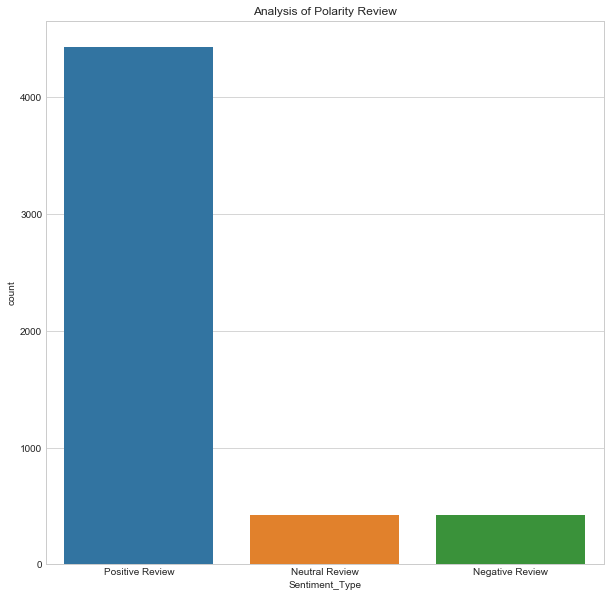

In [298]:
df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc).set_title("Analysis of Polarity Review")

In [299]:
positive_reviews=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Positive Review']
negative_reviews=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Negative Review']

In [300]:
negative_reviews.head()

,Review,sentiment,polarity,Sentiment_Type
70,two confessions: i thought the version was ...,-0.123571,0.712857,Negative Review
109,dullsville rambling meandering walk through b...,-0.091667,0.706667,Negative Review
154,the visual is different but because they use ...,-0.114630,0.484630,Negative Review
176,they missed it again massive visual effects ...,-0.125000,0.440000,Negative Review
218,herberts dune novels were difficult and somet...,-0.116211,0.760691,Negative Review


In [301]:
positive_reviews.head()

,Review,sentiment,polarity,Sentiment_Type
0,dune is a great book and it along with its se...,0.043970,0.450813,Positive Review
1,having read the book a hundred years ago it t...,0.116452,0.555721,Positive Review
2,it is not a simple film but an adaptation of ...,0.194861,0.540575,Positive Review
3,its been amazing being back in cinemas after ...,0.288478,0.558986,Positive Review
4,i just reviewed the movie based on the same...,0.117374,0.558525,Positive Review


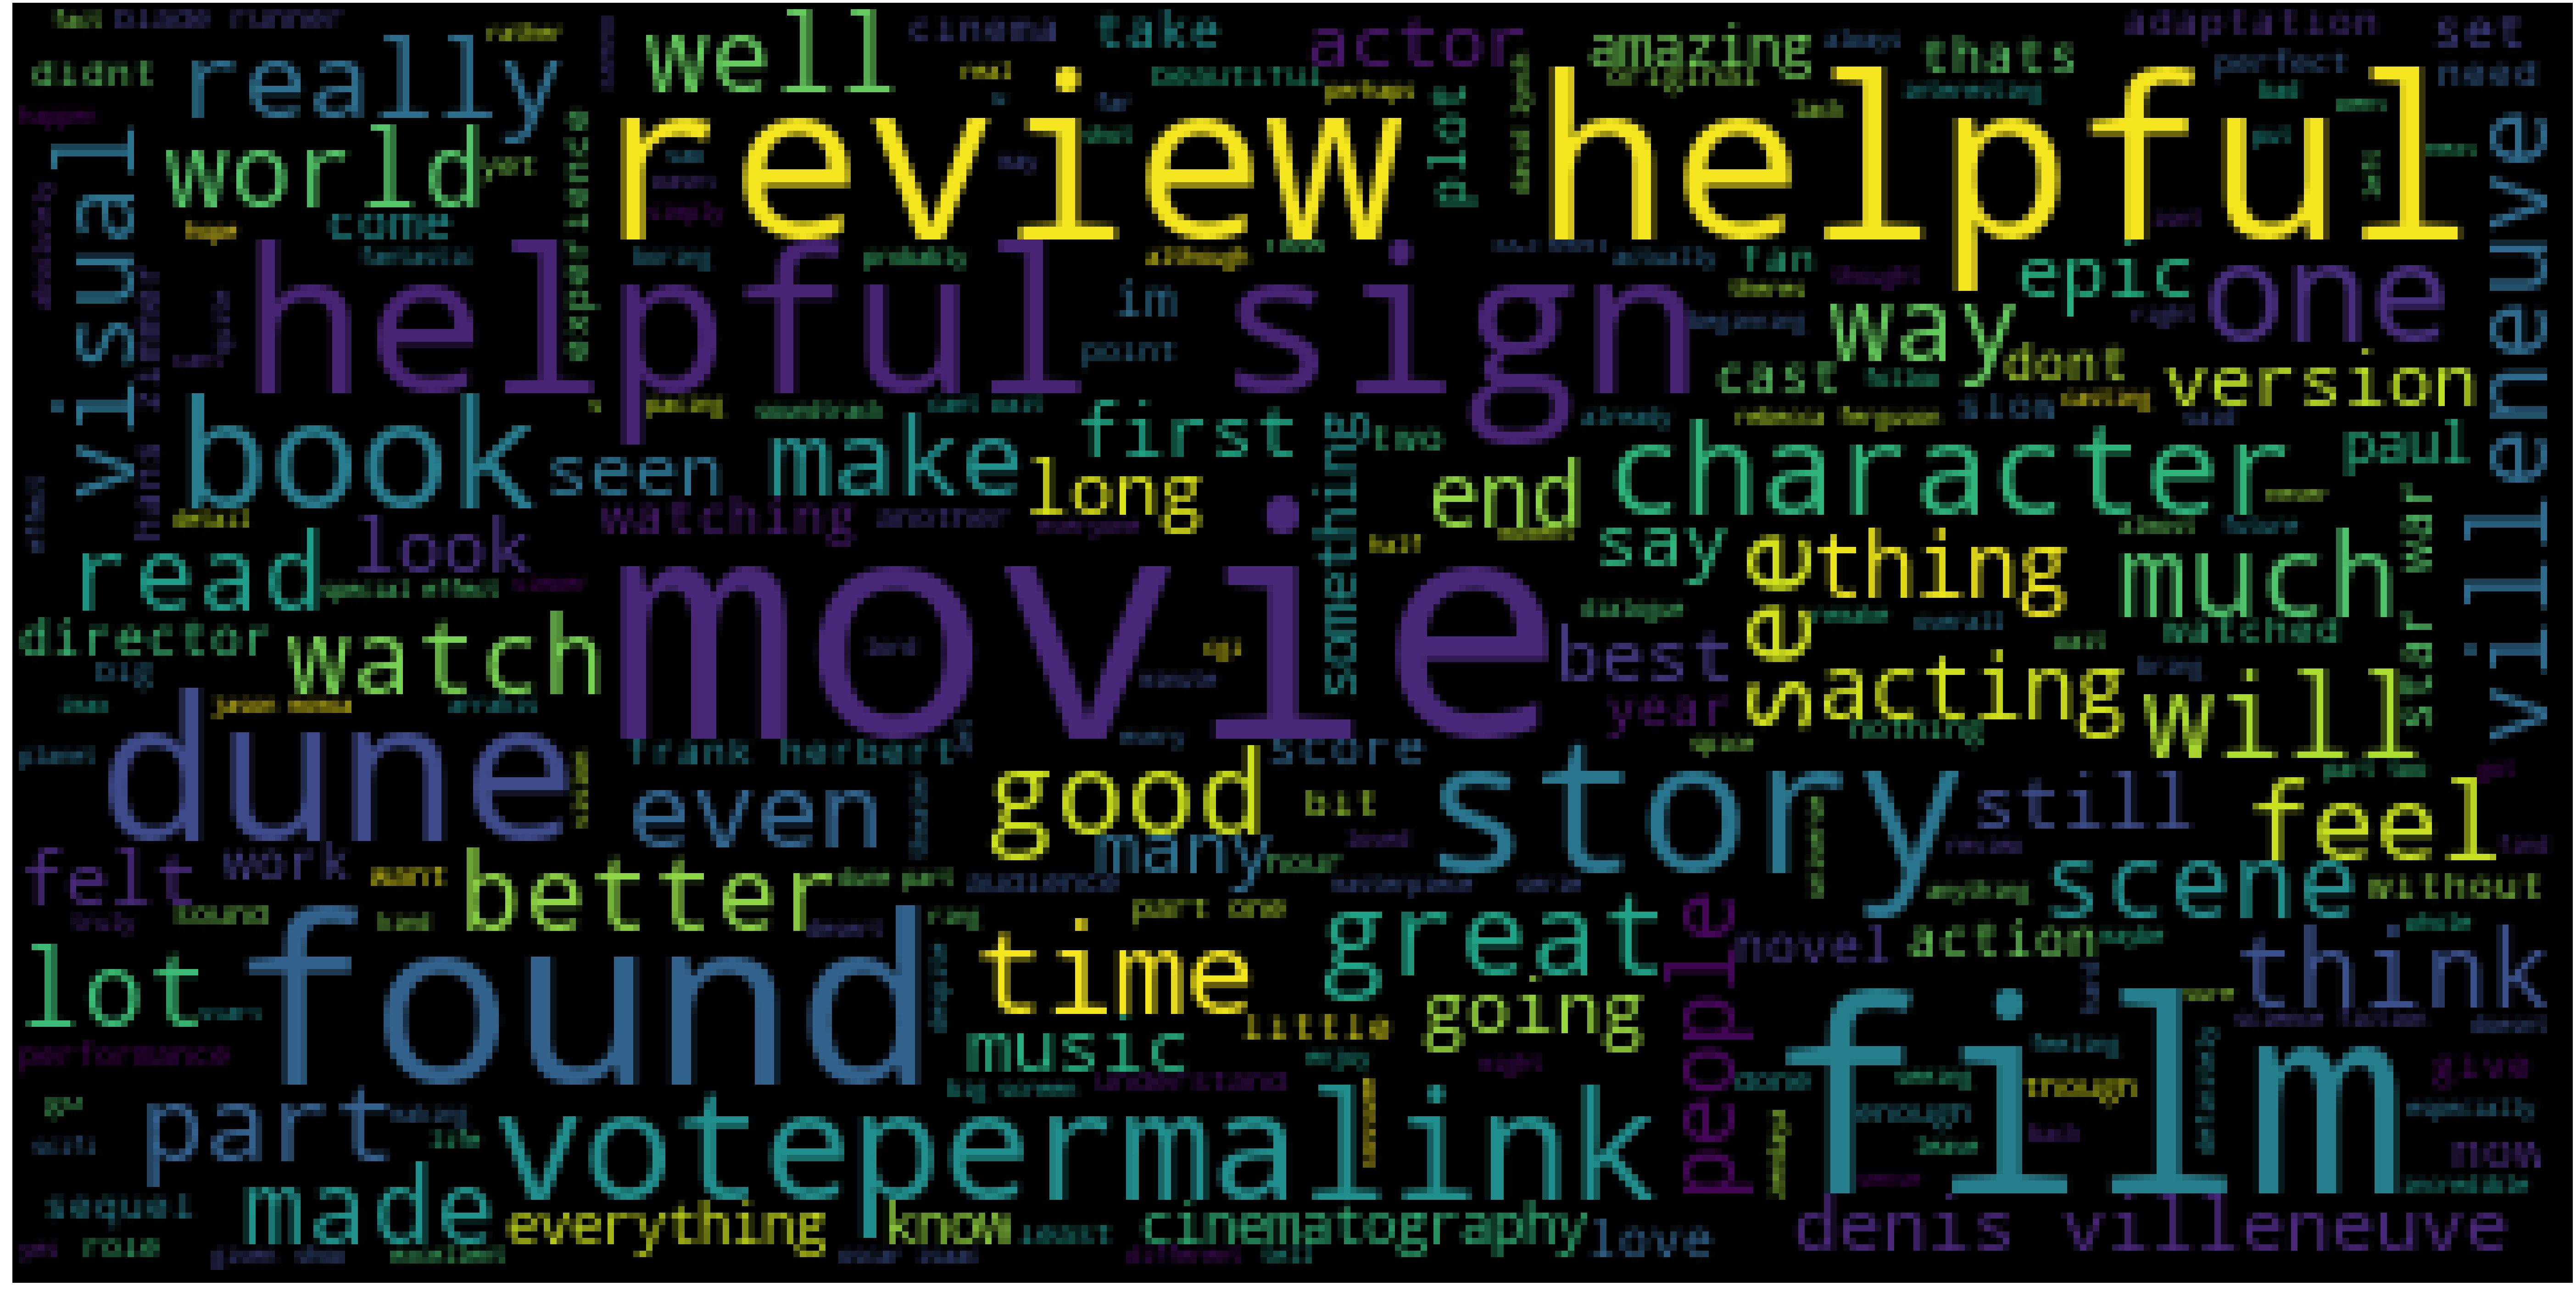

In [302]:
wc(positive_reviews['Review'],'black','Most Used Words')

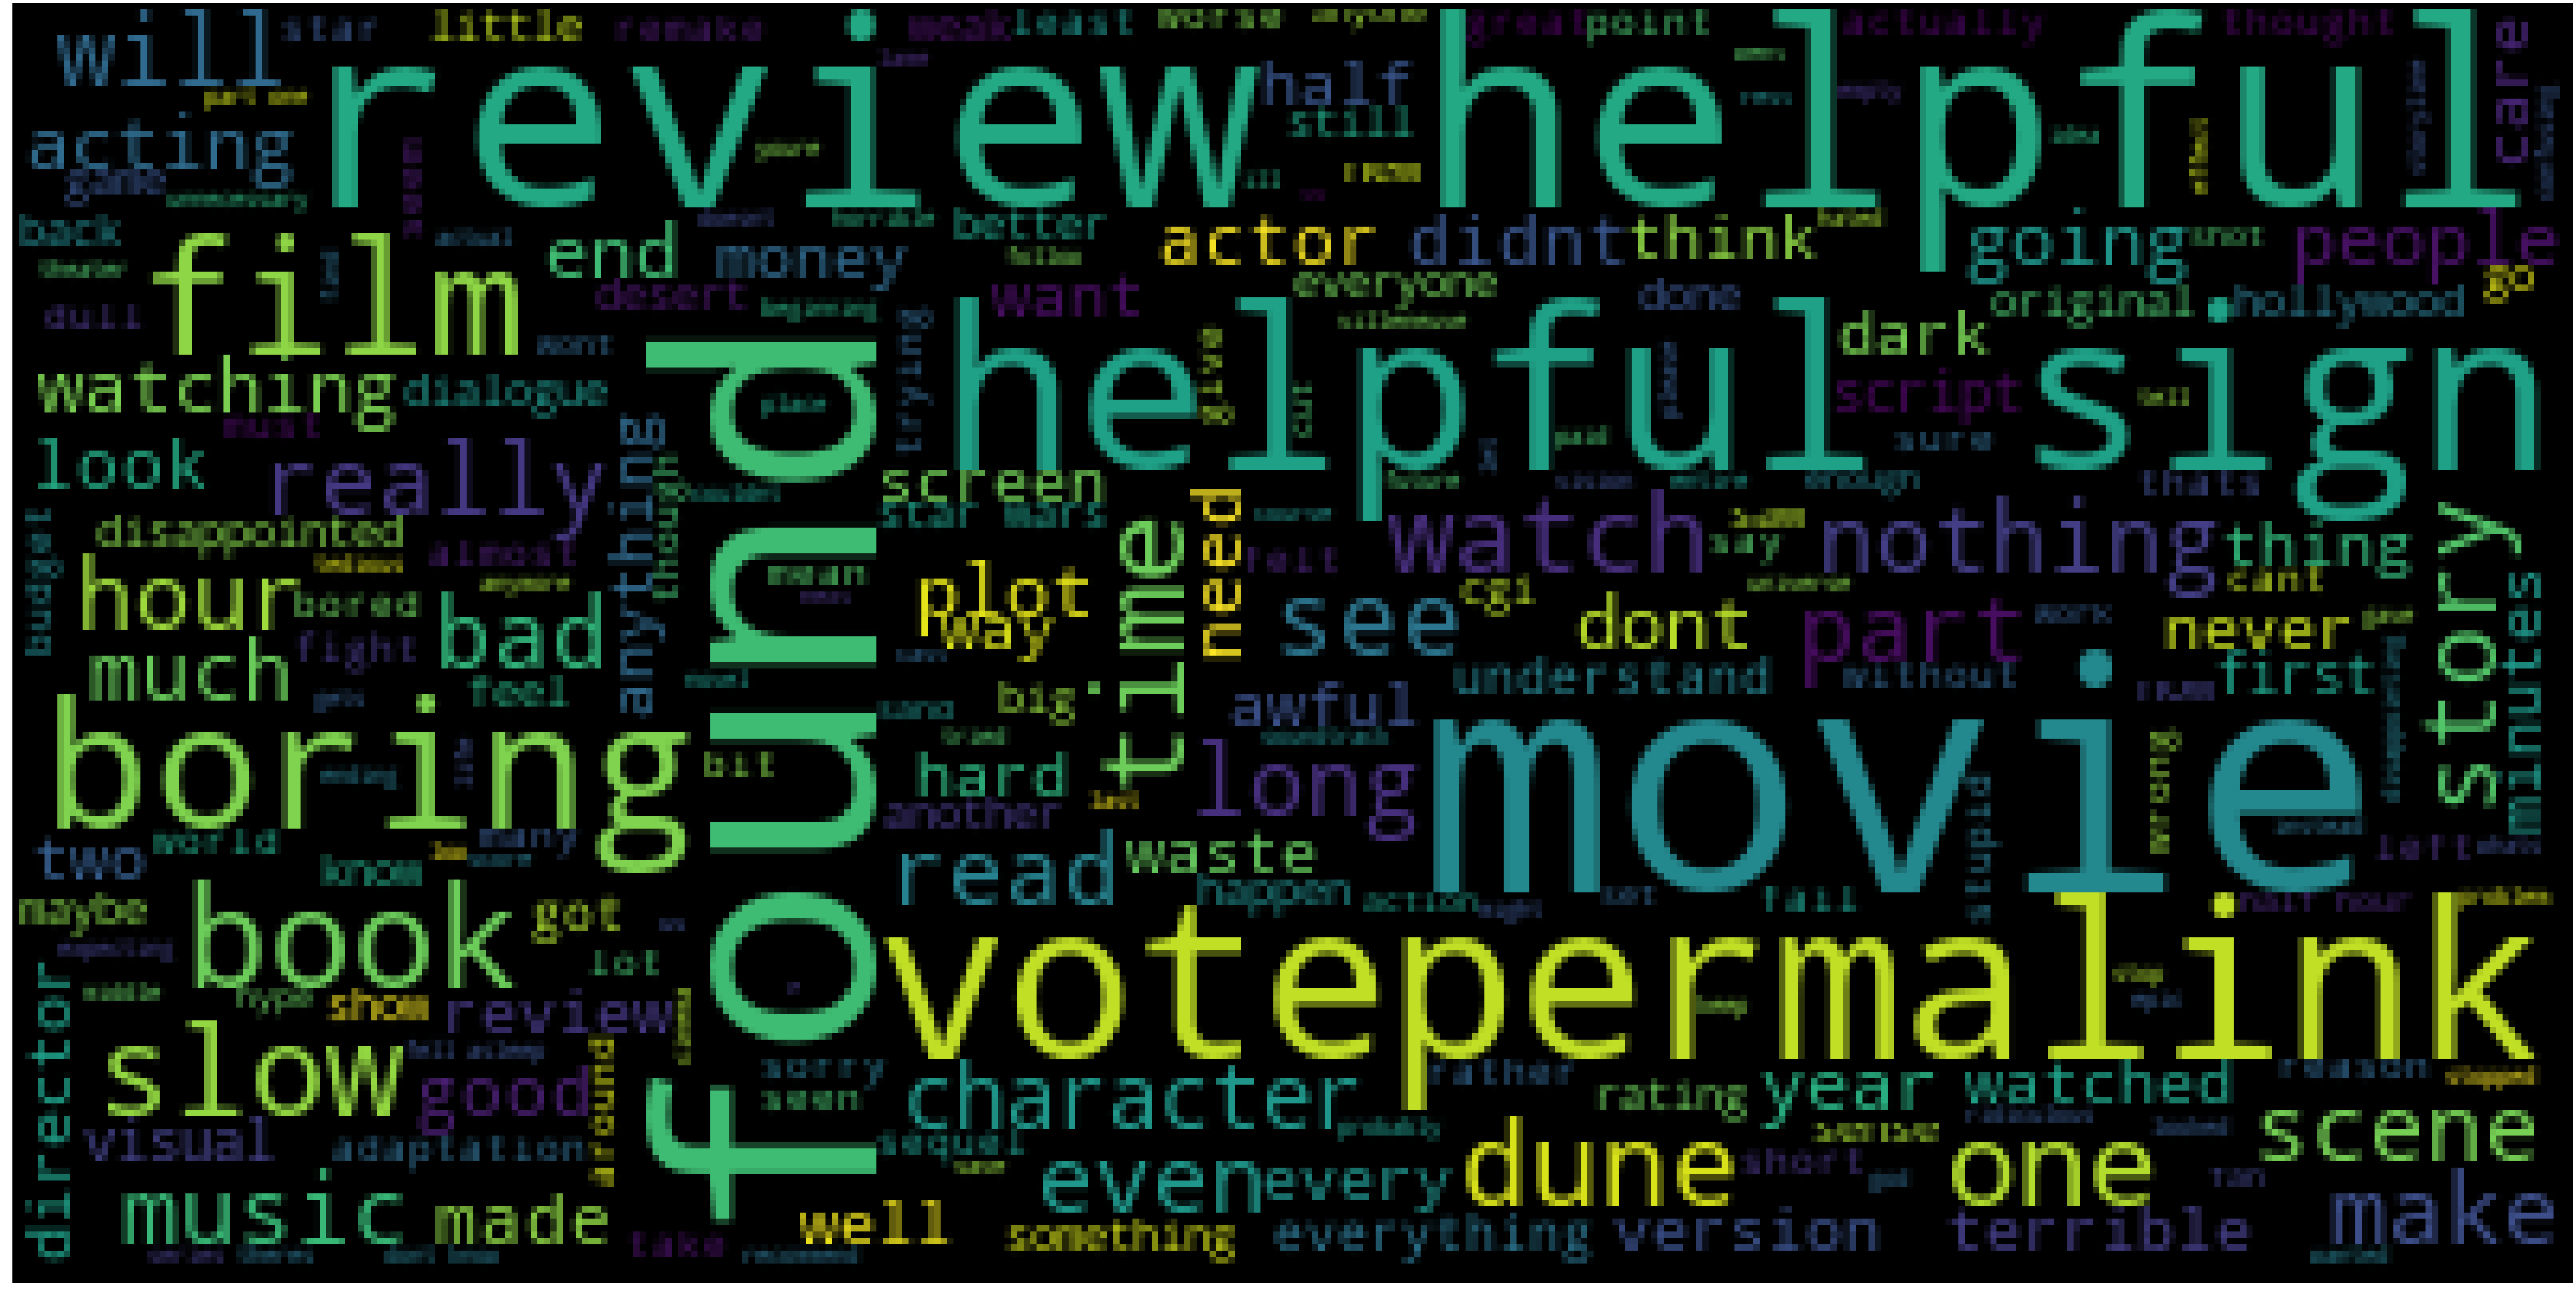

In [303]:
wc(negative_reviews['Review'],'black','Most Used Words')

In [331]:
df = pd.read_csv('data\cleaned_movie_dat_Dune1.csv')
df.drop(columns=["Unnamed: 0"],inplace=True)
print(df.head(5))
df.rename(columns={'Rate':'Rating'},inplace=True)
df.rename(columns={'Sentiment':'sentiment'},inplace=True)
df.head()

   Movie_ID                                             Review Sentiment  Rate
0         0   dune is a great book and it along with its se...  Positive     7
1         2   having read the book a hundred years ago it t...  Positive     8
2         3   it is not a simple film but an adaptation of ...  Positive     6
3         6   its been amazing being back in cinemas after ...  Positive    10
4         7   i just reviewed the  movie  based on the same...  Positive     9


,Movie_ID,Review,sentiment,Rating
0,0,dune is a great book and it along with its se...,Positive,7
1,2,having read the book a hundred years ago it t...,Positive,8
2,3,it is not a simple film but an adaptation of ...,Positive,6
3,6,its been amazing being back in cinemas after ...,Positive,10
4,7,i just reviewed the movie based on the same...,Positive,9


In [332]:
##Analyzer function
import string
def text_process(review):
    nopunc=[word for word in review if word not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
**********TASK3-NLP ANALYSIS USING COUNTVECTORIZER & NAIVE BAYES***

In [333]:
df=df.dropna(axis=0,how='any')
rating_class = df[(df['sentiment'] == "Positive") | (df['sentiment'] =="Negative")]
X_review=rating_class['Review']
y=rating_class['sentiment']

In [335]:
len(X_review)

2636

In [327]:
len(y)

2636

In [328]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer= CountVectorizer(analyzer=text_process).fit(X_review)

In [336]:
X_review = bow_transformer.transform(X_review)

In [337]:
#80/20 Train and Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_review, y, test_size=0.2, random_state=101)

In [369]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
nb = MultinomialNB()
nb.fit(X_train, y_train)
predict=nb.predict(X_test)
predict

array(['Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positi

In [339]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, predict))
print('\n Accuracy:')
print(accuracy_score(y_test, predict))
print(classification_report(y_test, predict))

[[  4 115]
 [ 20 389]]

 Accuracy:
0.7443181818181818
             precision    recall  f1-score   support

   Negative       0.17      0.03      0.06       119
   Positive       0.77      0.95      0.85       409

avg / total       0.64      0.74      0.67       528



In [340]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [341]:
nb.score(X_test, y_test)

0.7443181818181818

In [ ]:
#**Hypertuning the model with CV=5 and test data as 20% with random state as 101 to replicate the results**

In [398]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
nb1= MultinomialNB()
nb1.fit(X_train, y_train)
predict=nb1.predict(X_test)
predict
X_train, X_test, y_train, y_test = train_test_split(X_review, y, test_size=0.2, random_state=101)
nb1 = MultinomialNB()
scores = cross_val_score(nb1,X_train, y_train, cv=10, scoring="accuracy")
print(scores)
meanScore = scores.mean()
print(meanScore * 100)

[0.74881517 0.76777251 0.7535545  0.77251185 0.72511848 0.72037915
 0.73933649 0.7535545  0.73809524 0.74761905]
74.66756939742721


In [401]:
#**Hypertuning the model with CV=5**
nb2= MultinomialNB()
nb2.fit(X_train, y_train)
predict=nb2.predict(X_test)
predict
X_train, X_test, y_train, y_test = train_test_split(X_review, y, test_size=0.2, random_state=101)
scores = cross_val_score(nb2,X_train, y_train, cv=5, scoring="accuracy")
print(scores)
meanScore = scores.mean()
print(meanScore * 100)

[0.75118483 0.76540284 0.73933649 0.75296912 0.75296912]
75.23724825792797


In [405]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, predict))
print('\n Accuracy:')
print(accuracy_score(y_test, predict))
print(classification_report(y_test, predict))

[[  4 115]
 [ 20 389]]

 Accuracy:
0.7443181818181818
             precision    recall  f1-score   support

   Negative       0.17      0.03      0.06       119
   Positive       0.77      0.95      0.85       409

avg / total       0.64      0.74      0.67       528



In [215]:
#**Hypertuning the model with CV=3**
X_train, X_test, y_train, y_test = train_test_split(X_review, y, test_size=0.2, random_state=101)
scores = cross_val_score(nb1,X_train, y_train, cv=2, scoring="accuracy")
nb = MultinomialNB()
nb1.fit(X_train, y_train)
predict=nb1.predict(X_test)
predict
print(scores)
meanScore = scores.mean()
print(meanScore * 100)

[0.75818882 0.75868726]
75.84380416750359


In [ ]:
#Hypertuning with Undersampling#

In [ ]:
We have a 75 percent accuracy but a very recall score 
indicating that movies with ratings Negatives are not 
classified properly this maybe due to a large ratio of positive review. Hence it has a bad recall.

In [342]:
#Analysing The dataset to see the bias contributing to low precision and recalls
rating_positive=df['Review'][6]

In [343]:
rating_postive_transformed = bow_transformer.transform([rating_positive])
nb.predict(rating_postive_transformed)[0]

'Positive'

In [344]:
rating_negative=df['Review'][70]


In [348]:
rating_negative_transformed = bow_transformer.transform([rating_negative])
nb.predict(rating_negative_transformed)[0]

'Positive'

In [228]:
###Data Set is Highly Skewed or Biased

In [349]:
print("Percentage of Postive ratings: ", len(df[df.sentiment == "Positive"])/len(df))
print("Percentage of Negative ratings: ", len(df[df.sentiment == "Negative"])/len(df))
print("Total number of examples in resampled data: ", len(df))

Percentage of Postive ratings:  0.7689681335356601
Percentage of Negative ratings:  0.2310318664643399
Total number of examples in resampled data:  2636


In [350]:
#Undersampling the dataset to minimize skew
ratings_1 = (rating_class['sentiment']=="Negative").sum()
ratings_1_indices = np.array(rating_class[rating_class.sentiment == "Negative"].index)

In [351]:
ratings_10_indices = rating_class[rating_class.sentiment == "Positive"].index


random_normal_indices = np.random.choice(ratings_10_indices, ratings_1, replace = False)
random_normal_indices = np.array(random_normal_indices)

under_sample_indices = np.concatenate([ratings_1_indices,random_normal_indices])

In [352]:
undersample = rating_class.ix[under_sample_indices]

X_undersample = undersample.ix[:, undersample.columns != 'sentiment']
y_undersample = undersample.ix[:, undersample.columns == 'sentiment']

C:\Users\Jagakala\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\Jagakala\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jagakala\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix

In [353]:
print("Percentage of Postive ratings: ", len(undersample[undersample.sentiment == "Positive"])/len(undersample))
print("Percentage of Negative ratings: ", len(undersample[undersample.sentiment == "Negative"])/len(undersample))
print("Total number of examples in resampled data: ", len(undersample))

Percentage of Postive ratings:  0.5
Percentage of Negative ratings:  0.5
Total number of examples in resampled data:  1218


In [354]:
X_review_us = X_undersample['Review']

In [355]:
X_review_us = bow_transformer.transform(X_review_us)

In [356]:
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_review_us, y_undersample, test_size=0.2, random_state=101)

In [357]:
nb.fit(X_train_us, y_train_us)
predict_us=nb.predict(X_test_us)

C:\Users\Jagakala\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [361]:
print(confusion_matrix(y_test_us, predict_us))
print('\n Accuracy:')
print(accuracy_score(y_test_us, predict_us))
print(classification_report(y_test_us, predict_us))

[[57 74]
 [56 57]]

 Accuracy:
0.4672131147540984
             precision    recall  f1-score   support

   Negative       0.50      0.44      0.47       131
   Positive       0.44      0.50      0.47       113

avg / total       0.47      0.47      0.47       244



In [362]:
###Comparison of the results 
nb.fit(X_train_us, y_train_us)
predict_entire=nb.predict(X_test)

C:\Users\Jagakala\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [363]:
print(confusion_matrix(y_test, predict_entire))
print('\n Accuracy:')
print(accuracy_score(y_test, predict_entire))
print("After Hypertuning",classification_report(y_test, predict_entire))

[[100  19]
 [158 251]]

 Accuracy:
0.6647727272727273
After Hypertuning              precision    recall  f1-score   support

   Negative       0.39      0.84      0.53       119
   Positive       0.93      0.61      0.74       409

avg / total       0.81      0.66      0.69       528



In [364]:
print(confusion_matrix(y_test, predict))
print('\n Accuracy:')
print(accuracy_score(y_test, predict))
print("Before Hypertuning",classification_report(y_test, predict))

[[  4 115]
 [ 20 389]]

 Accuracy:
0.7443181818181818
Before Hypertuning              precision    recall  f1-score   support

   Negative       0.17      0.03      0.06       119
   Positive       0.77      0.95      0.85       409

avg / total       0.64      0.74      0.67       528

